In [ ]:
!kaggle datasets files mohammedosama/waymo-open-training-dataset-1


Next Page Token = CfDJ8GXdT74sZy9Iv4qC0qaf2ReX4o2k5KIc5YkEQD8uXFdOsACMJPJiKHiioH9VrQOgdJqd0CYU9Uc-rLWfQ-9EkPo
name                              size  creationDate         
------------------------------  ------  -------------------  
train-00000-of-01212.tfrecords     1GB  2021-11-30 11:26:59  
train-00001-of-01212.tfrecords     1GB  2021-11-30 11:27:22  
train-00002-of-01212.tfrecords     1GB  2021-11-30 11:27:22  
train-00003-of-01212.tfrecords   978MB  2021-11-30 11:27:20  
train-00004-of-01212.tfrecords   985MB  2021-11-30 11:28:01  
train-00005-of-01212.tfrecords     1GB  2021-11-30 11:28:05  
train-00006-of-01212.tfrecords     1GB  2021-11-30 11:27:58  
train-00007-of-01212.tfrecords   942MB  2021-11-30 11:27:53  
train-00008-of-01212.tfrecords   944MB  2021-11-30 11:27:58  
train-00009-of-01212.tfrecords     1GB  2021-11-30 11:28:00  
train-00010-of-01212.tfrecords     1GB  2021-11-30 11:27:56  
train-00011-of-01212.tfrecords     1GB  2021-11-30 11:27:59  
train-00012-of-01212.t

In [ ]:
!pip install kaggle
from google.colab import files
uploaded = files.upload()
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json


Saving kaggle.json to kaggle.json


In [ ]:
!pip install tensorflow


In [ ]:
!kaggle datasets download -d mohammedosama/waymo-open-training-dataset-1 -f train-00000-of-01212.tfrecords --force


Dataset URL: https://www.kaggle.com/datasets/mohammedosama/waymo-open-training-dataset-1
License(s): CC0-1.0
 97% 622M/644M [00:05<00:00, 145MB/s]
100% 644M/644M [00:05<00:00, 129MB/s]


In [ ]:
!ls -lh


total 645M
-rw-r--r-- 1 root root   73 Sep  9 19:31 kaggle.json
drwxr-xr-x 1 root root 4.0K Sep  6 13:22 sample_data
-rw-r--r-- 1 root root 645M Nov 30  2021 train-00000-of-01212.tfrecords.zip


In [ ]:
!unzip /content/train-00000-of-01212.tfrecords.zip

Archive:  /content/train-00000-of-01212.tfrecords.zip
  inflating: train-00000-of-01212.tfrecords  


In [ ]:
import tensorflow as tf

# Path to the TFRecord file
tfrecord_path = [
    '/content/train-00000-of-01212.tfrecords'
]
# Create a dataset
dataset = tf.data.TFRecordDataset(tfrecord_path)

# Function to decode a TFRecord example
def decode_raw_example(example_proto):
    # Create a dictionary describing the features.
    feature_description = {
        'image/encoded': tf.io.FixedLenFeature([], tf.string, default_value=''),
    }
    return tf.io.parse_single_example(example_proto, feature_description)

# Apply the function to each item in the dataset using the map transformation
decoded_dataset = dataset.map(decode_raw_example)

# Iterate over the decoded dataset to see the raw content of the first few records
for record in decoded_dataset.take(3):
    print(record)


{'image/encoded': <tf.Tensor: shape=(), dtype=string, numpy=b''>}
{'image/encoded': <tf.Tensor: shape=(), dtype=string, numpy=b''>}
{'image/encoded': <tf.Tensor: shape=(), dtype=string, numpy=b''>}


In [ ]:
import tensorflow as tf

# Path to the TFRecord file
tfrecord_path = [
    '/content/train-00000-of-01212.tfrecords'
]

# Create a dataset
dataset = tf.data.TFRecordDataset(tfrecord_path)

# Function to inspect the raw example
def inspect_tfrecord(example_proto):
    # Parse the example
    parsed_example = tf.train.Example.FromString(example_proto.numpy())

    # Extract the feature names
    feature_names = list(parsed_example.features.feature.keys())

    return feature_names

# Iterate over the dataset to inspect features in the first few records
for record in dataset.take(3):
    print(inspect_tfrecord(record))


['objects/shape/dimension', 'objects/difficulty_level/detection', 'lidars/front/id', 'lidars/side_left/extrinsics/t', 'lidars/side_right/pointcloud/elongation', 'cameras/front_right/intrinsics/K', 'lidars/top/camera_projections/ids', 'lidars/rear/camera_projections/positions', 'lidars/front/pointcloud/inside_nlz', 'lidars/rear/pointcloud/elongation', 'lidars/top/camera_projections/positions', 'cameras/front_left/intrinsics/distortion', 'cameras/front_right/intrinsics/distortion', 'lidars/top/pointcloud/elongation', 'lidars/rear/pointcloud/positions', 'cameras/side_left/id', 'lidars/rear/camera_projections/ids', 'lidars/front/pointcloud/positions', 'cameras/side_right/extrinsics/R', 'cameras/side_right/image', 'cameras/side_right/intrinsics/distortion', 'cameras/front_right/extrinsics/R', 'cameras/front/extrinsics/R', 'cameras/front_right/shutter_type', 'lidars/front/extrinsics/R', 'lidars/side_left/camera_projections/ids', 'objects/pose/t', 'lidars/top/id', 'objects/category/text', 'li

In [ ]:
import tensorflow as tf

tfrecord_path = [
   '/content/train-00000-of-01212.tfrecords'
]

# Create a dataset from the TFRecord file
dataset = tf.data.TFRecordDataset(tfrecord_path)

# Define a function to parse specific features from the TFRecord
def parse_tfrecord(example):
    # Define the feature description to parse only what you need
    feature_description = {
        'cameras/front/image': tf.io.FixedLenFeature([], tf.string),  # Adjust this as needed
        # Add other features if necessary, like:
        # 'timestamp': tf.io.FixedLenFeature([], tf.int64),
    }
    return tf.io.parse_single_example(example, feature_description)

# Apply the parsing function to the dataset
parsed_dataset = dataset.map(parse_tfrecord)

# Iterate over the parsed dataset to print and verify the data
for record in parsed_dataset.take(1):
    print(record['cameras/front/image'])


tf.Tensor(b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x01\x01,\x01,\x00\x00\xff\xdb\x00C\x00\x02\x01\x01\x01\x01\x01\x02\x01\x01\x01\x02\x02\x02\x02\x02\x04\x03\x02\x02\x02\x02\x05\x04\x04\x03\x04\x06\x05\x06\x06\x06\x05\x06\x06\x06\x07\t\x08\x06\x07\t\x07\x06\x06\x08\x0b\x08\t\n\n\n\n\n\x06\x08\x0b\x0c\x0b\n\x0c\t\n\n\n\xff\xdb\x00C\x01\x02\x02\x02\x02\x02\x02\x05\x03\x03\x05\n\x07\x06\x07\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\xff\xc0\x00\x11\x08\x05\x00\x07\x80\x03\x01"\x00\x02\x11\x01\x03\x11\x01\xff\xc4\x00\x1f\x00\x00\x01\x05\x01\x01\x01\x01\x01\x01\x00\x00\x00\x00\x00\x00\x00\x00\x01\x02\x03\x04\x05\x06\x07\x08\t\n\x0b\xff\xc4\x00\xb5\x10\x00\x02\x01\x03\x03\x02\x04\x03\x05\x05\x04\x04\x00\x00\x01}\x01\x02\x03\x00\x04\x11\x05\x12!1A\x06\x13Qa\x07"q\x142\x81\x91\xa1\x08#B\xb1\xc1\x15R\xd1\xf0$3br\x82\t\n\x16\x17\x18\x19\x1a%&\'()*456789:CDEFGHIJSTUVWXYZcdefghijstuvwxyz\x83\x84\x85\x86\x87\x88\x89\x8a\x92\x93\x94\x95\x96\

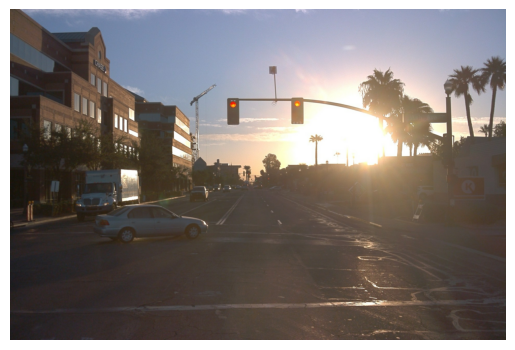

In [ ]:
import matplotlib.pyplot as plt
import cv2
import numpy as np

# Convert the image data from bytes to a usable format
image_data = record['cameras/front/image'].numpy()
image = tf.image.decode_jpeg(image_data)

# Display the image
plt.imshow(image)
plt.axis('off')
plt.show()


Preprocess the Data

In [ ]:
def preprocess_image(image):
    image = tf.image.decode_jpeg(image, channels=3)  # Ensure 3 channels (RGB)
    image = tf.image.resize(image, [128, 128])
    image = image / 255.0  # Normalize pixel values to [0, 1]
    return image

# Apply preprocessing to the parsed dataset
def preprocess_tfrecord(record):
    image = preprocess_image(record['cameras/front/image'])
    return image

# Apply the preprocessing function to the dataset
preprocessed_dataset = parsed_dataset.map(preprocess_tfrecord)

# Simulate labels and pair them with the preprocessed images
def add_labels(image):
    label = tf.random.uniform([], minval=0, maxval=2, dtype=tf.int32)  # Random label 0 or 1
    return image, label

# Apply the label function to each image in the dataset
labeled_dataset = preprocessed_dataset.map(add_labels)

# Shuffle and batch the labeled dataset
batch_size = 32
labeled_dataset = labeled_dataset.shuffle(buffer_size=1000).batch(batch_size)


Build a Simple Convolutional Neural Network (CNN)

In [ ]:
from tensorflow.keras import layers, models

# Define a simple CNN model
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(1, activation='sigmoid')  # Binary classification: normal vs adversarial
])

# Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',  # For binary classification
              metrics=['accuracy'])

# Display the model's architecture
model.summary()


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 126, 126, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 63, 63, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 61, 61, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 30, 30, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 28, 28, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 14, 14, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 12544)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │         802,880 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 859,265 (3.28 MB)

 Trainable params: 859,265 (3.28 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
import tensorflow as tf

# Simulate labels within the dataset pipeline
def add_labels(image):
    label = tf.random.uniform([], minval=0, maxval=2, dtype=tf.int32)  # Random label 0 or 1
    return image, label

# Apply the label function to each image in the dataset
labeled_dataset = preprocessed_dataset.map(add_labels)

# Shuffle and batch the labeled dataset
batch_size = 32
labeled_dataset = labeled_dataset.shuffle(buffer_size=1000).batch(batch_size)
labeled_dataset = labeled_dataset.repeat()

# Define the number of steps per epoch
steps_per_epoch = 10

# Train the model
model.fit(labeled_dataset, epochs=10, steps_per_epoch=steps_per_epoch)


Epoch 1/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 6s 326ms/step - accuracy: 0.5504 - loss: 0.7179
Epoch 2/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 4s 303ms/step - accuracy: 0.4708 - loss: 0.6966
Epoch 3/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 3s 282ms/step - accuracy: 0.4262 - loss: 0.6935
Epoch 4/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 3s 330ms/step - accuracy: 0.4967 - loss: 0.6934
Epoch 5/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 3s 272ms/step - accuracy: 0.5035 - loss: 0.6931
Epoch 6/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 3s 273ms/step - accuracy: 0.5370 - loss: 0.6932
Epoch 7/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 3s 278ms/step - accuracy: 0.4993 - loss: 0.6932
Epoch 8/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 3s 276ms/step - accuracy: 0.4961 - loss: 0.6931
Epoch 9/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 3s 306ms/step - accuracy: 0.5054 - loss: 0.6931
Epoch 10/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 3s 272ms/step - accuracy: 0.4721 - loss: 0.6933


Data augmentation

In [ ]:
# Add data augmentation to the preprocessing function
def preprocess_image(image):
    image = tf.image.decode_jpeg(image, channels=3)
    image = tf.image.resize(image, [128, 128])

    # Apply random augmentations
    image = tf.image.random_flip_left_right(image)  # Randomly flip the image horizontally
    image = tf.image.random_brightness(image, max_delta=0.1)  # Randomly adjust brightness
    image = tf.image.random_contrast(image, lower=0.8, upper=1.2)  # Randomly adjust contrast

    image = image / 255.0  # Normalize pixel values to [0, 1]
    return image

# Apply preprocessing to the parsed dataset with augmentation
preprocessed_dataset = parsed_dataset.map(preprocess_tfrecord)

labeled_dataset = preprocessed_dataset.map(add_labels)
labeled_dataset = labeled_dataset.shuffle(buffer_size=1000).batch(batch_size).repeat()

# Train the model again
model.fit(labeled_dataset, epochs=10, steps_per_epoch=5)


Epoch 1/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 3s 185ms/step - accuracy: 0.5067 - loss: 0.6931
Epoch 2/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 3s 204ms/step - accuracy: 0.4086 - loss: 0.6937
Epoch 3/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 3s 244ms/step - accuracy: 0.4815 - loss: 0.6932
Epoch 4/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 214ms/step - accuracy: 0.5819 - loss: 0.6930
Epoch 5/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 222ms/step - accuracy: 0.3774 - loss: 0.6936
Epoch 6/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 218ms/step - accuracy: 0.5384 - loss: 0.6930
Epoch 7/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 220ms/step - accuracy: 0.4229 - loss: 0.6934
Epoch 8/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 247ms/step - accuracy: 0.4504 - loss: 0.6933
Epoch 9/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 218ms/step - accuracy: 0.5095 - loss: 0.6931
Epoch 10/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 216ms/step - accuracy: 0.4685 - loss: 0.6932


Model tuning

In [ ]:
# Example of adding dropout and increasing the number of filters
from tensorflow.keras import layers, models

# Define a more complex CNN model with dropout
model = models.Sequential([
    layers.Conv2D(64, (3, 3), activation='relu', input_shape=(128, 128, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.5),  # Dropout layer to prevent overfitting
    layers.Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Train the model again
model.fit(labeled_dataset, epochs=10, steps_per_epoch=5)


Epoch 1/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 6s 483ms/step - accuracy: 0.4652 - loss: 0.7826
Epoch 2/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 5s 527ms/step - accuracy: 0.4664 - loss: 0.7221
Epoch 3/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 4s 558ms/step - accuracy: 0.4688 - loss: 0.6910
Epoch 4/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 3s 553ms/step - accuracy: 0.4712 - loss: 0.7189
Epoch 5/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 3s 620ms/step - accuracy: 0.5460 - loss: 0.6919
Epoch 6/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 3s 563ms/step - accuracy: 0.5822 - loss: 0.6904
Epoch 7/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 3s 556ms/step - accuracy: 0.4858 - loss: 0.6945
Epoch 8/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 3s 625ms/step - accuracy: 0.4539 - loss: 0.7009
Epoch 9/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 3s 602ms/step - accuracy: 0.4487 - loss: 0.7018
Epoch 10/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 3s 593ms/step - accuracy: 0.4906 - loss: 0.6946


Learning Rate Adjustment

In [ ]:
from tensorflow.keras.optimizers import Adam

# Compile the model with a lower learning rate
model.compile(optimizer=Adam(learning_rate=0.0001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Train the model again
model.fit(labeled_dataset, epochs=10, steps_per_epoch=5)


Epoch 1/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 6s 475ms/step - accuracy: 0.4751 - loss: 0.6964
Epoch 2/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 5s 556ms/step - accuracy: 0.4945 - loss: 0.6959
Epoch 3/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 4s 560ms/step - accuracy: 0.4920 - loss: 0.6953
Epoch 4/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 3s 549ms/step - accuracy: 0.5127 - loss: 0.6909
Epoch 5/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 3s 555ms/step - accuracy: 0.4642 - loss: 0.6902
Epoch 6/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 3s 629ms/step - accuracy: 0.4361 - loss: 0.6992
Epoch 7/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 3s 569ms/step - accuracy: 0.5168 - loss: 0.6932
Epoch 8/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 3s 553ms/step - accuracy: 0.4836 - loss: 0.6926
Epoch 9/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 3s 558ms/step - accuracy: 0.5597 - loss: 0.6925
Epoch 10/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 3s 600ms/step - accuracy: 0.4840 - loss: 0.6939


In [ ]:
import numpy as np
from sklearn.metrics import accuracy_score

predictions = model.predict(labeled_dataset, steps=5)

# Simulated true labels for demonstration purposes
true_labels = np.random.randint(2, size=predictions.shape)

# Define a range of thresholds to test
thresholds = np.arange(0.1, 0.9, 0.1)
best_accuracy = 0
best_threshold = 0

# Loop over thresholds and calculate accuracy
for threshold in thresholds:
    predicted_classes = (predictions > threshold).astype(int)
    accuracy = accuracy_score(true_labels, predicted_classes)
    print(f"Accuracy with decision threshold {threshold:.1f}: {accuracy:.4f}")

    # Update best accuracy and threshold
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_threshold = threshold

# Print the best threshold and its corresponding accuracy
print(f"\nBest threshold: {best_threshold:.1f} with accuracy: {best_accuracy:.4f}")


5/5 ━━━━━━━━━━━━━━━━━━━━ 3s 170ms/step
Accuracy with decision threshold 0.1: 0.5000
Accuracy with decision threshold 0.2: 0.5000
Accuracy with decision threshold 0.3: 0.5000
Accuracy with decision threshold 0.4: 0.5000
Accuracy with decision threshold 0.5: 0.4627
Accuracy with decision threshold 0.6: 0.5000
Accuracy with decision threshold 0.7: 0.5000
Accuracy with decision threshold 0.8: 0.5000

Best threshold: 0.1 with accuracy: 0.5000


In [ ]:
# Use the best threshold to make final predictions
final_predictions = (predictions > best_threshold).astype(int)

# Print the final predictions
print(f"Final predictions using threshold {best_threshold:.1f}: {final_predictions.flatten()}")


Final predictions using threshold 0.1: [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Calculate accuracy
accuracy = accuracy_score(true_labels, final_predictions)
print(f"Accuracy: {accuracy:.4f}")

# Calculate precision
precision = precision_score(true_labels, final_predictions)
print(f"Precision: {precision:.4f}")

# Calculate recall
recall = recall_score(true_labels, final_predictions)
print(f"Recall: {recall:.4f}")

# Calculate F1 score
f1 = f1_score(true_labels, final_predictions)
print(f"F1 Score: {f1:.4f}")


Accuracy: 0.5000
Precision: 0.5000
Recall: 1.0000
F1 Score: 0.6667


In [ ]:
# Try a slightly higher threshold
higher_threshold = best_threshold + 0.1

# Make predictions using the higher threshold
higher_threshold_predictions = (predictions > higher_threshold).astype(int)

# Evaluate the model's performance with the higher threshold
higher_precision = precision_score(true_labels, higher_threshold_predictions)
higher_recall = recall_score(true_labels, higher_threshold_predictions)
higher_f1 = f1_score(true_labels, higher_threshold_predictions)

print(f"With Threshold {higher_threshold:.1f}: Precision: {higher_precision:.4f}, Recall: {higher_recall:.4f}, F1 Score: {higher_f1:.4f}")


With Threshold 0.2: Precision: 0.5000, Recall: 1.0000, F1 Score: 0.6667


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Extract features from the dataset using the CNN model
features = model.predict(preprocessed_dataset.batch(batch_size))

# Simulate labels for demonstration purposes (use actual labels in practice)
labels = np.random.randint(2, size=(features.shape[0],))

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=42)

# Train a Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)

# Predict on the test set
rf_predictions = rf_classifier.predict(X_test)

# Evaluate the Random Forest model
rf_accuracy = accuracy_score(y_test, rf_predictions)
rf_precision = precision_score(y_test, rf_predictions)
rf_recall = recall_score(y_test, rf_predictions)
rf_f1 = f1_score(y_test, rf_predictions)

print(f"Random Forest - Accuracy: {rf_accuracy:.4f}, Precision: {rf_precision:.4f}, Recall: {rf_recall:.4f}, F1 Score: {rf_f1:.4f}")


5/5 ━━━━━━━━━━━━━━━━━━━━ 3s 466ms/step
Random Forest - Accuracy: 0.5926, Precision: 0.6667, Recall: 0.4286, F1 Score: 0.5217


/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


In [ ]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid for Random Forest
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

# Initialize the Random Forest model
rf_model = RandomForestClassifier(random_state=42)

# Initialize GridSearchCV to find the best parameters
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2, scoring='f1')

# Fit the model
grid_search.fit(X_train, y_train)

# Get the best parameters
best_params = grid_search.best_params_
print(f"Best parameters found: {best_params}")

# Evaluate the best model
best_rf_model = grid_search.best_estimator_
best_rf_predictions = best_rf_model.predict(X_test)

# Evaluate performance
best_rf_accuracy = accuracy_score(y_test, best_rf_predictions)
best_rf_precision = precision_score(y_test, best_rf_predictions)
best_rf_recall = recall_score(y_test, best_rf_predictions)
best_rf_f1 = f1_score(y_test, best_rf_predictions)

print(f"Best Random Forest - Accuracy: {best_rf_accuracy:.4f}, Precision: {best_rf_precision:.4f}, Recall: {best_rf_recall:.4f}, F1 Score: {best_rf_f1:.4f}")


Fitting 3 folds for each of 216 candidates, totalling 648 fits


/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/backend/fork_exec.py:38: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid = os.fork()
/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/backend/fork_exec.py:38: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid = os.fork()


Best parameters found: {'bootstrap': False, 'max_depth': None, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 50}
Best Random Forest - Accuracy: 0.5185, Precision: 0.5714, Recall: 0.2857, F1 Score: 0.3810


In [ ]:
# Make sure both are calculated on the same dataset
cnn_test_predictions = cnn_predictions[:len(rf_predictions_proba)]

# Make sure the shapes match
print("CNN predictions shape:", cnn_test_predictions.shape)
print("Random Forest probabilities shape:", rf_predictions_proba.shape)

# Average the predictions from both models
ensemble_predictions = (cnn_test_predictions + rf_predictions_proba) / 2

# Apply the best threshold to the ensemble predictions
final_ensemble_predictions = (ensemble_predictions > best_threshold).astype(int)

# Evaluate the ensemble model
ensemble_accuracy = accuracy_score(y_test, final_ensemble_predictions)
ensemble_precision = precision_score(y_test, final_ensemble_predictions)
ensemble_recall = recall_score(y_test, final_ensemble_predictions)
ensemble_f1 = f1_score(y_test, final_ensemble_predictions)

print(f"Ensemble Model - Accuracy: {ensemble_accuracy:.4f}, Precision: {ensemble_precision:.4f}, Recall: {ensemble_recall:.4f}, F1 Score: {ensemble_f1:.4f}")


CNN predictions shape: (27,)
Random Forest probabilities shape: (27,)
Ensemble Model - Accuracy: 0.5185, Precision: 0.5185, Recall: 1.0000, F1 Score: 0.6829


In [ ]:
# Calculate the prediction probabilities for the positive class
rf_prediction_proba = rf_classifier.predict_proba(X_test)[:, 1]

# Define a threshold for detecting anomalies (e.g., lower than 0.2 or higher than 0.8)
anomaly_threshold_low = 0.2
anomaly_threshold_high = 0.8

# Detect anomalies
anomalies = (rf_prediction_proba < anomaly_threshold_low) | (rf_prediction_proba > anomaly_threshold_high)

# Count anomalies
num_anomalies = np.sum(anomalies)
print(f"Number of detected anomalies: {num_anomalies}")


Number of detected anomalies: 14


In [ ]:
# Example of a simple ensemble model combining Random Forest with another classifier
from sklearn.ensemble import VotingClassifier
from sklearn.svm import SVC

# Define an SVM classifier for ensemble
svm_classifier = SVC(probability=True, random_state=42)

# Create a Voting Classifier for multi-layer defense
voting_classifier = VotingClassifier(estimators=[
    ('rf', rf_classifier),
    ('svm', svm_classifier)
], voting='soft')

# Train the voting classifier
voting_classifier.fit(X_train, y_train)

# Predict with the ensemble model
ensemble_predictions = voting_classifier.predict(X_test)

# Evaluate the ensemble model
ensemble_accuracy = accuracy_score(y_test, ensemble_predictions)
ensemble_precision = precision_score(y_test, ensemble_predictions)
ensemble_recall = recall_score(y_test, ensemble_predictions)
ensemble_f1 = f1_score(y_test, ensemble_predictions)

# Print the results correctly
print(f"Ensemble Model - Accuracy: {ensemble_accuracy:.4f}, Precision: {ensemble_precision:.4f}, Recall: {ensemble_recall:.4f}, F1 Score: {ensemble_f1:.4f}")



Ensemble Model - Accuracy: 0.5926, Precision: 0.6667, Recall: 0.4286, F1 Score: 0.5217


In [ ]:
import joblib

# Save the entire ensemble model to a file
joblib.dump(voting_classifier, 'final_ensemble_model.pkl')

print("Model saved as 'final_ensemble_model.pkl'")


Model saved as 'final_ensemble_model.pkl'
